In [0]:
 import numpy as np ## for calculations on data
import csv

import sklearn
import matplotlib.pyplot as plt
from sklearn.svm import SVR
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso

In [0]:
df = pd.read_csv('INTC.csv')
#df.index = [x for x in range(1, len(df.values)+1)]
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/12/2018,44.560001,44.980000,44.060001,44.930000,43.801979,29778700.0
1,9/13/2018,45.680000,45.849998,45.110001,45.570000,44.425911,18657100.0
2,9/14/2018,45.779999,45.970001,45.349998,45.540001,44.396664,22998700.0
3,9/17/2018,45.290001,45.900002,45.189999,45.419998,44.279678,17603200.0
4,9/18/2018,45.580002,46.529999,45.410000,46.099998,44.942604,20528100.0


In [0]:
#Create the lists / X and y data set
dates = []
prices = []

In [0]:
df.shape ## to show the number of rows and column

(251, 7)

In [0]:
df.tail(1) ## data we will be testing on

,Date,Open,High,Low,Close,Adj Close,Volume
250,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [0]:
#Get all of the data except for the last row -> basically creating another dataset to work with and the predict for the last date
df = df.head(len(df)-1)
print(df.shape)

(250, 7)


In [0]:
df_dates = df.loc[:,'Date'] ## the date column of the dataset is stored into a variabe df_dates
df_open = df.loc[:,'Open'] ## the open column of the dataset is stored into a variabe df_open

In [0]:
for date in df_dates:
    (date.split('/'))
    dates.append( [int(date.split('/')[1])] ) ## the .split helps us take only the date and remvoes the month and year

    
# Create the dependent data set 'y' as prices

for open_price in df_open: 
    prices.append(float(open_price))

In [0]:
print(dates[:10])

[[12], [13], [14], [17], [18], [19], [20], [21], [24], [25]]


In [0]:
#Function to make predictions 
def predict_prices(dates, prices, x): 
    
    #Create the 3 Support Vector Regression models
    svr_lin = SVR(kernel='linear', C= 1e3)
    svr_poly= SVR(kernel='poly', C=1e3, degree=2)
    svr_rbf = SVR(kernel='rbf', C=1e3, gamma=0.1)
    
    
    #Train the SVR models 
    svr_lin.fit(dates,prices)
    svr_poly.fit(dates,prices)
    svr_rbf.fit(dates,prices)
    
    #Create the Linear Regression model and train it using fitting 
    lin_reg = LinearRegression()
    lin_reg.fit(dates,prices)
    
    ## Creating a ridge regression model 
    rr = Ridge(alpha=0.01)
    rr.fit(dates,prices)
    
    ## Creating a lasso model 
    lasso = Lasso()
    lasso.fit(dates,prices)
    
    #Plot the models on a graph to see which has the best fit
     
    plt.scatter(dates, prices, color='black', label='Data')
    plt.plot(dates, svr_rbf.predict(dates), color='red', label='SVR RBF')
    plt.plot(dates, svr_poly.predict(dates), color='blue', label='SVR Poly')
    plt.plot(dates, svr_lin.predict(dates), color='green', label='SVR Linear')
    plt.plot(dates, lin_reg.predict(dates), color='orange', label='Linear Reg')
    plt.plot(dates, rr.predict(dates), color='magenta', label='Ridge Reg')
    plt.plot(dates, lasso.predict(dates), color='cyan', label='Lasso Reg')
    
    plt.xlabel('Days')
    plt.ylabel('Price')
    plt.title('Regression')
    plt.legend().draggable
    plt.show()
    print ('the svr_rbf predicted value is', svr_rbf.predict(x)[0])
    print ('the svr_lin predicted value is ',svr_lin.predict(x)[0])
    print ('the svr_poly predicted value is ',svr_poly.predict(x)[0])
    print ('the lin_reg predicted value is ',lin_reg.predict(x)[0])
    print ('the ridge_reg predicted value is ',rr.predict(x)[0])
    print ('the lasso_reg predicted value is ',lasso.predict(x)[0])



/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


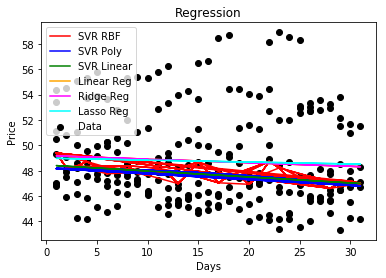

the svr_rbf predicted value is 48.33032487944946
the svr_lin predicted value is  48.21352788253455
the svr_poly predicted value is  48.129999174598204
the lin_reg predicted value is  49.05284943213468
the ridge_reg predicted value is  49.052849273148695
the lasso_reg predicted value is  48.91238170172585
None


In [0]:
predicted_price = predict_prices(dates, prices, [[5]]) ## 5 is the date we saw in the df.tail() 
print(predicted_price)